In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

MEDIAN RESULT
overestimation:  0.7508960573476703
underestimation:  0.2302867383512545
similarity:  0.018817204301075224


CABLE-POP
overestimation:  0.7815356489945156
underestimation:  0.19744058500914077
similarity:  0.021023765996343674


CLASSIC
overestimation:  0.7436823104693141
underestimation:  0.22653429602888087
similarity:  0.029783393501805033


CLM5.0
overestimation:  0.7513611615245009
underestimation:  0.2323049001814882
similarity:  0.016333938294010864


DLEM
overestimation:  0.38788426763110306
underestimation:  0.6103074141048824
similarity:  0.001808318264014508


IBIS
overestimation:  0.35802469135802467
underestimation:  0.6362773029439696
similarity:  0.005698005698005715


ISAM
overestimation:  0.7981900452488688
underestimation:  0.1755656108597285
similarity:  0.026244343891402677


ISBA-CTRIP
overestimation:  0.48014440433212996
underestimation:  0.509927797833935
similarity:  0.009927797833935048


JSBACH
overestimation:  0.6836827711941659
underestimation:

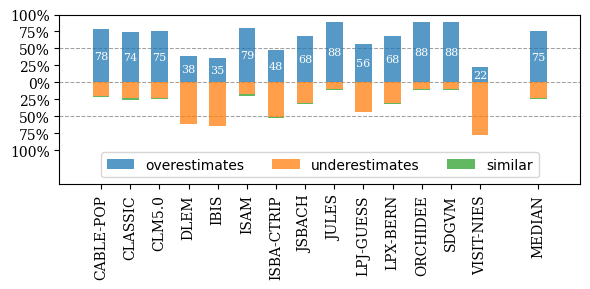

In [2]:
# Calculate the median result.
def cal_compare_median():
    data = pd.read_excel(r"dataset\result.xlsx")
    T = data['Trendy_CO2']
    S = data['Observations_CO2']
    k = 1.1
    T1, S1 = np.ravel(T), np.ravel(S)
    m1, m2, m3 = 0, 0, 0
    l = len(T1)
    for j in range(l):
        if T1[j] > 1.1 * S1[j]:
            m1 = m1 + 1
        elif T1[j] < 0.9 * S1[j]:
            m2 = m2 + 1
        else:
            m3 = m3 + 1
    print("MEDIAN RESULT")
    print("overestimation: ", m1/l)
    print("underestimation: ", m2/l)
    print("similarity: ", 1 - m1/l - m2/l)
    return m1/l, m2/l, 1 - m1/l - m2/l

# Calculate the each model result.
def cal_compare_all():
    trendy_name = ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM', 'IBIS', 'ISAM',
                    'ISBA-CTRIP', 'JSBACH', 'JULES', 'LPJ-GUESS', 'LPX-BERN', 
                    'ORCHIDEE', 'SDGVM', 'VISIT-NIES']
    data = pd.read_csv(r"dataset\trendy_all_base_trend.csv")
    data_Ob = pd.read_excel(r"dataset\result.xlsx")
    S = np.ravel(data_Ob['Observations_CO2'])
    data = np.array(data)[:, 1:]
    m_larger, m_smaller, m_similar = [], [], []
    for i in range(14):
        T = np.ravel(data[i, :])
        T = np.float64(T)
        T1 = T[np.isnan(T) == False]
        S1 = S[np.isnan(T) == False]
        l = len(T1)
        m1, m2, m3 = 0, 0, 0
        for j in range(l):
            if T1[j]>1.1*S1[j]:
                m1 = m1+1
            elif T1[j]<0.9*S1[j]:
                m2 = m2+1
            else:
                m3 = m3+1
        m_larger.append(m1/l*100)
        m_smaller.append(m2/l*100)
        m_similar.append(m3/l*100)
        print("\n")
        print(trendy_name[i])
        print("overestimation: ", m1/l)
        print("underestimation: ", m2/l)
        print("similarity: ", 1 - m1/l - m2/l)
    return m_larger, m_smaller, m_similar

# Plot Figure S2.
def Figure_S2():
    med_larger, med_smaller, med_similar = cal_compare_median()
    m_larger, m_smaller, m_similar = cal_compare_all()

    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)
    c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    alpha = 0.75
    ax.plot([-2, 24], [50, 50], ls='--', lw=0.75, color='gray', alpha=0.75, zorder=0)
    ax.plot([-2, 24], [0.0, 0.0], ls='--', lw=0.75, color='gray', alpha=0.75, zorder=0)
    ax.plot([-2, 24], [-50, -50], ls='--', lw=0.75, color='gray', alpha=0.75, zorder=0)
    
    p = ax.bar(x=[1.4*i for i in range(14)], height=m_larger, color=c[0], alpha=alpha, label='overestimates', zorder=10)
    ax.bar_label(p, label_type='center', fmt='%d', zorder=10, color='w', fontsize=8, fontfamily='serif')
    ax.bar(x=[1.4*i for i in range(14)], height=[-i for i in m_smaller], color=c[1], alpha=alpha, label='underestimates', zorder=10)
    ax.bar(x=[1.4*i for i in range(14)], height=[-i for i in m_similar], alpha=alpha, label='similar',
           bottom=[-i for i in m_smaller], color=c[2], zorder=10)
    
    p = ax.bar(x=[1.4*15], height=[med_larger*100], color=c[0], alpha=alpha, zorder=10)
    ax.bar_label(p, label_type='center', fmt='%d', zorder=10, color='w', fontsize=8, fontfamily='serif')
    ax.bar(x=[1.4*15], height=[-med_smaller*100], color=c[1], alpha=alpha, zorder=10)
    ax.bar(x=[1.4*15], height=[-med_similar*100], alpha=alpha,
           bottom=[-med_smaller*100], color=c[2], zorder=10)
    trendy_name = ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM', 'IBIS', 'ISAM',
                    'ISBA-CTRIP', 'JSBACH', 'JULES', 'LPJ-GUESS', 'LPX-BERN', 
                    'ORCHIDEE', 'SDGVM', 'VISIT-NIES', 'MEDIAN']
    plt.xticks([1.4*i for i in range(14)]+[1.4*15], trendy_name, family='serif',
               rotation=90)
    plt.yticks([-100+25*i for i in range(9)],
               ['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'], family='serif')
    plt.xlim([-2, 23])
    plt.ylim([-150, 100])
    plt.legend(loc='lower center', ncol=3)
    plt.tight_layout()
    plt.rcParams['savefig.dpi'] = 3000
    plt.show()
Figure_S2()